In [20]:
import pandas as pd
import numpy as np
import networkx as nx

import pickle
import json

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20, 11)}, font_scale=2)

from tqdm import tqdm
from sklearn.cluster import DBSCAN


# Import Custom packages
import sys
sys.path.append('../../')
import utils
import semantic_type_propagation as stp

# Jaccard Similarity

In [21]:
df_path = '../../output/synthetic_example_large/'
g_path = '../../../graph_construction/combined_graphs_output/synthetic_benchmark_large/bipartite/bipartite.graph'

df = pd.read_pickle(df_path + 'graph_stats_with_groundtruth_df.pickle')
G = pickle.load(open(g_path, "rb"))

# Remove nodes with degree 1 from the dataframe
df = stp.process_df(df, G)

# Compute the groundtruth for the number of meanings for each homograph
df = utils.num_meanings.get_num_meanings_groundtruth(df, G)
df[df['is_homograph'] == True].sort_values(by='betweenness_centrality', ascending=False)

100%|██████████| 180/180 [00:00<00:00, 4468.34it/s]

There are 6502 cell nodes with a degree greater than 1
There are 611 unique ranks based on BC.


,node,node_type,betweenness_centrality,is_homograph,dense_rank,num_meanings_groundtruth
7590,Palm,cell,1.445700e-02,True,1.0,2
25825,Clementine,cell,8.975958e-03,True,2.0,2
7130,Magnolia,cell,8.132084e-03,True,3.0,2
3077,Jaguar,cell,8.049376e-03,True,4.0,2
7416,Timothy,cell,6.921700e-03,True,5.0,2
...,...,...,...,...,...,...
2000,MD,cell,2.103537e-07,True,275.0,2
1828,SD,cell,2.059766e-07,True,276.0,2
2004,ME,cell,1.214843e-07,True,314.0,2
1950,NC,cell,7.969017e-08,True,329.0,2


In [53]:
df['num_meanings_groundtruth'].value_counts()

1    6322
2     176
3       4
Name: num_meanings_groundtruth, dtype: int64

In [54]:
df[df['num_meanings_groundtruth'] > 2]

,node,node_type,betweenness_centrality,is_homograph,dense_rank,num_meanings_groundtruth,num_meanings,is_num_meanings_correct
300,Lincoln,cell,0.004879,True,8.0,3,5.0,False
2012,Montana,cell,0.002381,True,15.0,3,4.0,False
1401,Aurora,cell,0.001690,True,20.0,3,5.0,False
546,Virginia,cell,0.001467,True,25.0,3,3.0,True


In [22]:
homographs = df[df['is_homograph'] == True]['node'].values
homographs

array(['Palm', 'Clementine', 'Magnolia', 'Jaguar', 'Timothy', 'Cougar',
       'Lettuce', 'Lincoln', 'Pumpkin', 'Charity', 'Viva', 'Morgan',
       'Western', 'Impala', 'Montana', 'Jicama', 'Mariner', 'Guava',
       'Suzy', 'Aurora', 'Jimmy', 'Somerset', 'Wade', 'Darcy', 'Cuba',
       'Virginia', 'Elmira', 'Chicago', 'Children', 'Ransom', 'Magnum',
       'Brooklyn', 'Gantz', 'Jamaica', 'Bar', 'Denton', 'Corbin',
       'Starbuck', 'Hugo', 'House', 'Yucca', 'Michael', 'Terri',
       'Crossfire', 'Inger', 'Golden', 'Middleton', 'Constantine',
       'Luther', 'Kiwi', 'Kohlrabi', 'Aura', 'Barrie', 'Harland', 'Tracy',
       'Pathfinder', 'Focus', 'MG', 'Rio', 'M', 'Ford', 'Noah', 'Tacoma',
       'Tucson', 'Madison', 'Danbury', 'Dayton', 'Jackson', 'Equinox',
       'Mirage', 'Katy', 'Raleigh', 'Kimberley', 'Montgomery', 'Orlando',
       'Tyler', 'ES', 'Rogue', 'Marguerite', 'Calley', 'Glen', 'Townsend',
       'Fredi', 'Laurence', 'Shane', 'Cinderella', 'Janos', 'Ginger',
       'Br

In [118]:
matrices_path = df_path + 'num_meanings/jaccard/matrices/'

test_homograph = 'MA'
m = np.load(matrices_path + test_homograph +'.npy')
idx_to_node = pickle.load(open(matrices_path + test_homograph + '_idx_to_node.pickle', 'rb'))
print('Homograph:', test_homograph)
print('Jaccard Matrix:\n', m)
print('Distance Matrix:\n', 1-m)

print('Index to node dictionary:', idx_to_node)
print('Column names that homograph is connected to:', utils.graph_helpers.get_cell_node_column_names(G, test_homograph))

labels = DBSCAN(min_samples=1, metric='precomputed', eps=0.7).fit_predict(1-m)
print(labels)

Homograph: MA
Jaccard Matrix:
 [[1.         0.67114094 0.66438356 0.57692308 0.60645161 0.66666667
  0.6462585  0.63333333 0.08609272 0.06756757]
 [0.67114094 1.         0.67785235 0.63225806 0.6        0.61538462
  0.64900662 0.68       0.08917197 0.08552632]
 [0.66438356 0.67785235 1.         0.69178082 0.63398693 0.61842105
  0.65306122 0.62913907 0.09271523 0.07432432]
 [0.57692308 0.63225806 0.69178082 1.         0.64285714 0.61688312
  0.61842105 0.67114094 0.09803922 0.08724832]
 [0.60645161 0.6        0.63398693 0.64285714 1.         0.63636364
  0.64900662 0.64705882 0.09615385 0.07843137]
 [0.66666667 0.61538462 0.61842105 0.61688312 0.63636364 1.
  0.67808219 0.6        0.09150327 0.07333333]
 [0.6462585  0.64900662 0.65306122 0.61842105 0.64900662 0.67808219
  1.         0.62251656 0.10067114 0.08219178]
 [0.63333333 0.68       0.62913907 0.67114094 0.64705882 0.6
  0.62251656 1.         0.10596026 0.08053691]
 [0.08609272 0.08917197 0.09271523 0.09803922 0.09615385 0.09150

In [75]:
m_list = (1-m).flatten().tolist()
m_list = [val for val in m_list if val > 0]
np.array(m_list).mean()

0.7813488995546422

In [128]:
def get_epsilon(m, lower_bound=0, upper_bound=0.99):
    '''
    m is a distance matrix

    Whenever 'm_list' is empty return an epsilon of 1-`upper_bound`
    '''
    m_list = m.flatten().tolist()
    m_list = [val for val in m_list if val > lower_bound] 
    m_list = [val for val in m_list if val < upper_bound]

    if len(m_list) > 0:
        return max(m_list)
    else:
        return 1-upper_bound

In [129]:
df['num_meanings'] = np.nan
df['epsilon'] = np.nan
homs_with_noise=0
num_non_trivial_predictions = 0

# Loop over the homographs and estimate the number of meanings 
for node in homographs:
    # Check number of attributes 'node' is connected to
    if len(utils.graph_helpers.get_attribute_of_instance(G, node)) > 2:
        m = 1 - np.load(matrices_path + node + '.npy')
        idx_to_node = pickle.load(open(matrices_path + node + '_idx_to_node.pickle', 'rb'))

        # Get mean of matrix (remove zeros)
        epsilon = get_epsilon(m)

        labels = DBSCAN(min_samples=1, metric='precomputed', eps=epsilon).fit_predict(m)

        if -1 in labels:
            homs_with_noise += 1

        num_meanings = len(set(labels))
        df.loc[df['node'] == node, 'num_meanings'] = num_meanings
        df.loc[df['node'] == node, 'epsilon'] = epsilon
        num_non_trivial_predictions+=1
    else:
        df.loc[df['node'] == node, 'num_meanings'] = 2

print("Number of homographs with noise:", homs_with_noise)
print("Number of non-trivial predictions:", num_non_trivial_predictions)
df['is_num_meanings_correct'] = df['num_meanings'] == df['num_meanings_groundtruth']
df[df['is_homograph']==True]

Number of homographs with noise: 0
Number of non-trivial predictions: 102


,node,node_type,betweenness_centrality,is_homograph,dense_rank,num_meanings_groundtruth,num_meanings,is_num_meanings_correct,epsilon
7590,Palm,cell,1.445700e-02,True,1.0,2,2.0,True,0.970414
25825,Clementine,cell,8.975958e-03,True,2.0,2,2.0,True,0.812009
7130,Magnolia,cell,8.132084e-03,True,3.0,2,2.0,True,NaN
3077,Jaguar,cell,8.049376e-03,True,4.0,2,2.0,True,0.692718
7416,Timothy,cell,6.921700e-03,True,5.0,2,2.0,True,NaN
...,...,...,...,...,...,...,...,...,...
2000,MD,cell,2.103537e-07,True,275.0,2,1.0,False,0.908497
1828,SD,cell,2.059766e-07,True,276.0,2,1.0,False,0.913907
2004,ME,cell,1.214843e-07,True,314.0,2,1.0,False,0.907285
1950,NC,cell,7.969017e-08,True,329.0,2,1.0,False,0.912752


In [130]:
df_homs = df[df['is_homograph']==True]
df_homs['is_num_meanings_correct'].value_counts()

True     160
False     20
Name: is_num_meanings_correct, dtype: int64

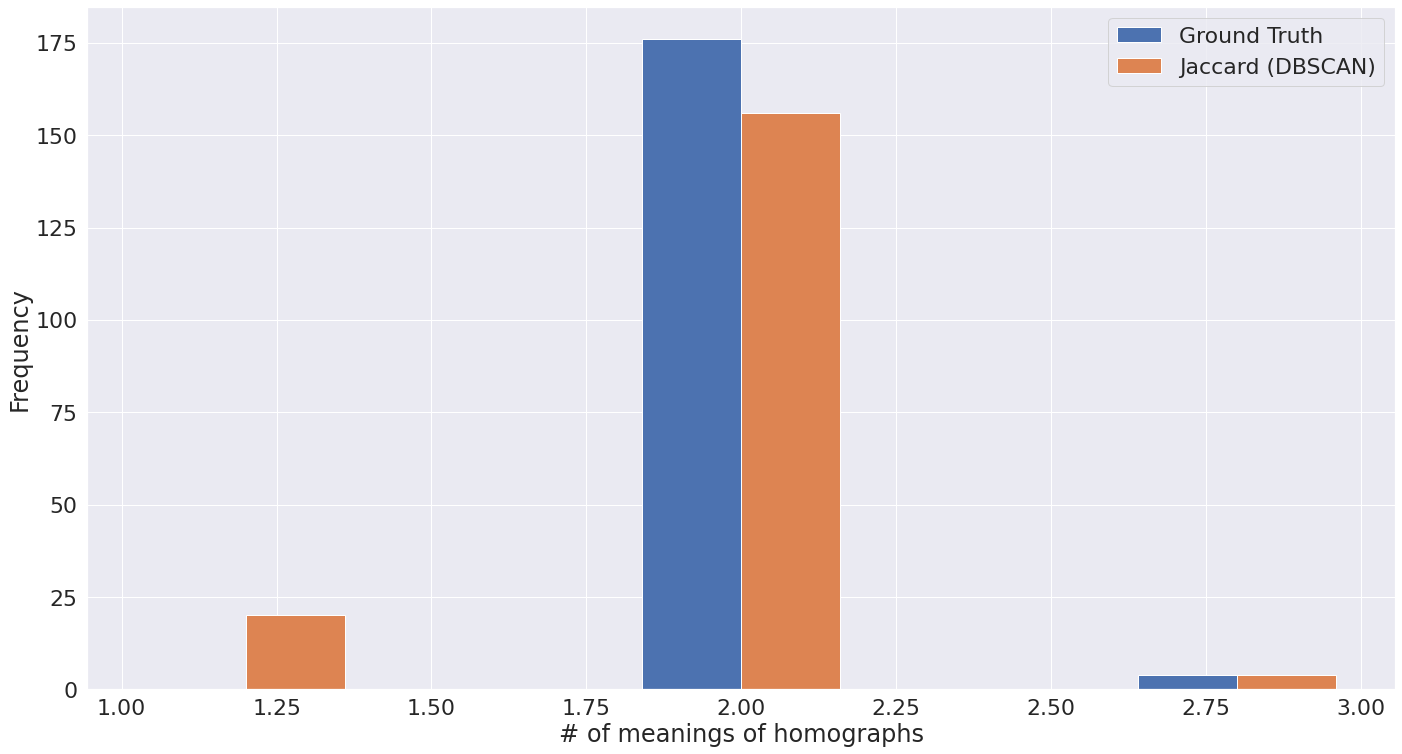

In [131]:
ax = plt.hist([df_homs['num_meanings_groundtruth'], df_homs['num_meanings']], bins=5, label=['Ground Truth', 'Jaccard (DBSCAN)'])
plt.xlabel('# of meanings of homographs');plt.ylabel('Frequency');plt.legend();plt.tight_layout()
# plt.savefig('../../figures/num_meanings/TUS/num_meanings_top_300_propagation_histogram.svg')

In [132]:
df_homs[df_homs['is_num_meanings_correct']==False]

,node,node_type,betweenness_centrality,is_homograph,dense_rank,num_meanings_groundtruth,num_meanings,is_num_meanings_correct,epsilon
1839,AZ,cell,6.340709e-07,True,256.0,2,1.0,False,0.932432
1835,PA,cell,6.340709e-07,True,256.0,2,1.0,False,0.932432
1840,TN,cell,6.340709e-07,True,256.0,2,1.0,False,0.932432
1787,CO,cell,6.340709e-07,True,256.0,2,1.0,False,0.932432
1794,MA,cell,6.340709e-07,True,256.0,2,1.0,False,0.932432
1824,AL,cell,6.340709e-07,True,256.0,2,1.0,False,0.932432
1819,MN,cell,6.340709e-07,True,256.0,2,1.0,False,0.932432
1758,ID,cell,6.340709e-07,True,256.0,2,1.0,False,0.932432
1795,CA,cell,6.340709e-07,True,256.0,2,1.0,False,0.932432
1916,IL,cell,3.965424e-07,True,259.0,2,1.0,False,0.925676
